<a href="https://colab.research.google.com/github/haniyerajabzade/st/blob/main/SpecialTopic_HM02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment analysis on Yelp data**

**download Yelp JSON File **

In [ ]:
!wget -O yelp_reviews.csv "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/yelp.csv"

--2025-12-08 16:42:59--  https://raw.githubusercontent.com/justmarkham/DAT8/master/data/yelp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8091185 (7.7M) [text/plain]
Saving to: ‘yelp_reviews.csv’

yelp_reviews.csv    100%[===================>]   7.72M  --.-KB/s    in 0.08s   

2025-12-08 16:42:59 (95.3 MB/s) - ‘yelp_reviews.csv’ saved [8091185/8091185]



                                                text  stars  label
0  My wife took me here on my birthday for breakf...      5      1
1  I have no idea why some people give bad review...      5      1
2  love the gyro plate. Rice is so good and I als...      4      1
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...      5      1
4  General Manager Scott Petello is a good egg!!!...      5      1
ماتریس درهم‌ریختگی:
[[ 835  841]
 [4254 4070]]


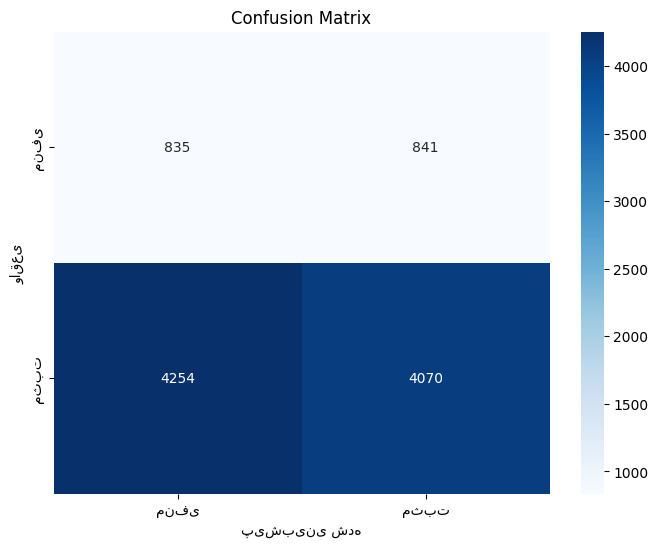

Accuracy: 0.4905
Precision: 0.8288
Recall: 0.4889
F1-score: 0.6150

Classification Report:
              precision    recall  f1-score   support

        منفی       0.16      0.50      0.25      1676
        مثبت       0.83      0.49      0.62      8324

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.43     10000
weighted avg       0.72      0.49      0.55     10000



In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import random

# تنظیم فونت برای نمایش فارسی در نمودارها
plt.rcParams['font.family'] = 'DejaVu Sans'

# ---------- بارگذاری داده ها ----------
df = pd.read_csv("yelp_reviews.csv")  # مسیر فایل review واقعی شما

# ---------- برچسب‌گذاری داده‌ها ----------
# 3, 4, 5 ستاره → مثبت، 1, 2 ستاره → منفی
def label_from_stars(star):
    if star >= 3:
        return 1
    else:
        return 0

df['label'] = df['stars'].apply(label_from_stars)

# ---------- نمایش چند نمونه ----------
print(df[['text', 'stars', 'label']].head())

# ---------- تابع پیش‌بینی ساده (Heuristic) ----------
def predict_sentiment(text):
    """
    پیش‌بینی بر اساس قوانین ساده:
    - شامل "خوب" یا "عالی" → مثبت
    - شامل "بد" یا "نیست" → منفی
    - در غیر این صورت → تصادفی
    """
    if 'خوب' in text or 'عالی' in text:
        return 1
    elif 'بد' in text or 'نیست' in text:
        return 0
    else:
        return random.choice([0, 1])

# اعمال پیش‌بینی روی داده‌ها
df['pred'] = df['text'].apply(predict_sentiment)

# ---------- محاسبه ماتریس درهم‌ریختگی ----------
cm = confusion_matrix(df['label'], df['pred'])
tn, fp, fn, tp = cm.ravel()

print("ماتریس درهم‌ریختگی:")
print(cm)

# نمایش ماتریس گرافیکی
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['منفی', 'مثبت'],
            yticklabels=['منفی', 'مثبت'])
plt.xlabel('پیش‌بینی شده')
plt.ylabel('واقعی')
plt.title('Confusion Matrix')
plt.show()

# ---------- محاسبه معیارها ----------
accuracy = accuracy_score(df['label'], df['pred'])
precision = precision_score(df['label'], df['pred'])
recall = recall_score(df['label'], df['pred'])
f1 = f1_score(df['label'], df['pred'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# ---------- گزارش کامل ----------
print("\nClassification Report:")
print(classification_report(df['label'], df['pred'], target_names=['منفی','مثبت']))


ماتریس درهم‌ریختگی (Confusion Matrix)

ماتریس درهم‌ریختگی:
                پیش‌بینی شده
                مثبت   منفی
واقعی   مثبت    4070      4254
        منفی    841      835


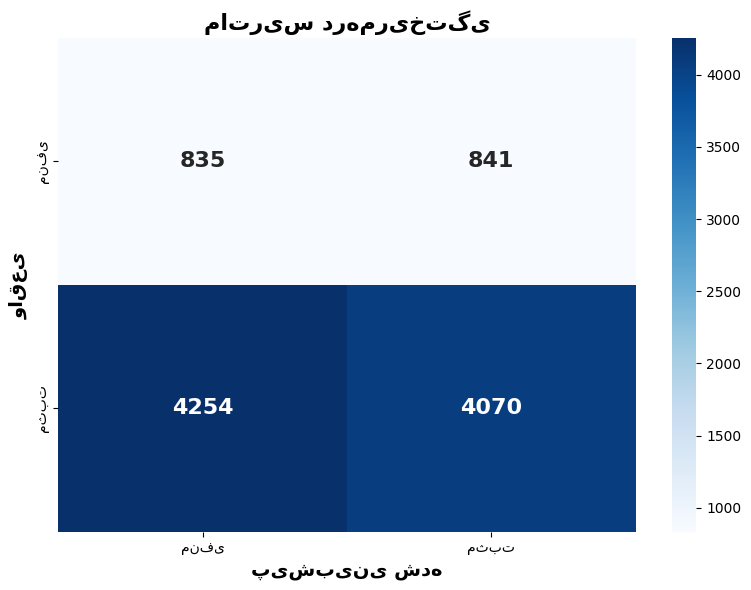


جزئیات ماتریس درهم‌ریختگی:
True Positive (TP):  4070 - پیش‌بینی مثبت صحیح
True Negative (TN):  835 - پیش‌بینی منفی صحیح
False Positive (FP): 841 - پیش‌بینی مثبت نادرست
False Negative (FN): 4254 - پیش‌بینی منفی نادرست

آمار کلی:
تعداد کل نمونه‌ها: 10000
پیش‌بینی‌های صحیح: 4905
پیش‌بینی‌های نادرست: 5095
نرخ خطا: 0.509

معیارهای برای کلاس مثبت:
حساسیت (Sensitivity / Recall): 0.489
دقت مثبت (Precision): 0.829

معیارهای برای کلاس منفی:
اختصاصیت (Specificity): 0.498
دقت منفی: 0.164


In [ ]:
# ---------- بخش دوم: ماتریس درهم‌ریختگی و معیارها ----------

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# فرض کنید df['label'] واقعی و df['pred'] پیش‌بینی هستند
true_labels = df['label']
predicted_labels = df['pred']

# ایجاد و نمایش ماتریس درهم‌ریختگی (Confusion Matrix)
print("=" * 50)
print("ماتریس درهم‌ریختگی (Confusion Matrix)")
print("=" * 50)

cm = confusion_matrix(true_labels, predicted_labels)
tn, fp, fn, tp = cm.ravel()

# نمایش ماتریس به صورت متنی
print(f"\nماتریس درهم‌ریختگی:")
print(f"                پیش‌بینی شده")
print(f"                مثبت   منفی")
print(f"واقعی   مثبت    {tp}      {fn}")
print(f"        منفی    {fp}      {tn}")

# نمایش گرافیکی ماتریس
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['منفی', 'مثبت'],
            yticklabels=['منفی', 'مثبت'],
            annot_kws={"size": 16, "weight": "bold"})

plt.xlabel('پیش‌بینی شده', fontsize=14, fontweight='bold')
plt.ylabel('واقعی', fontsize=14, fontweight='bold')
plt.title('ماتریس درهم‌ریختگی', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# جزئیات ماتریس
print(f"\nجزئیات ماتریس درهم‌ریختگی:")
print(f"True Positive (TP):  {tp} - پیش‌بینی مثبت صحیح")
print(f"True Negative (TN):  {tn} - پیش‌بینی منفی صحیح")
print(f"False Positive (FP): {fp} - پیش‌بینی مثبت نادرست")
print(f"False Negative (FN): {fn} - پیش‌بینی منفی نادرست")

# محاسبه معیارهای کلی
total = tp + tn + fp + fn
correct_predictions = tp + tn
wrong_predictions = fp + fn

print(f"\nآمار کلی:")
print(f"تعداد کل نمونه‌ها: {total}")
print(f"پیش‌بینی‌های صحیح: {correct_predictions}")
print(f"پیش‌بینی‌های نادرست: {wrong_predictions}")
print(f"نرخ خطا: {wrong_predictions/total:.3f}")

# محاسبه معیارها برای هر کلاس
print(f"\nمعیارهای برای کلاس مثبت:")
print(f"حساسیت (Sensitivity / Recall): {tp/(tp+fn):.3f}" if (tp+fn) > 0 else "تعریف نشده")
print(f"دقت مثبت (Precision): {tp/(tp+fp):.3f}" if (tp+fp) > 0 else "تعریف نشده")

print(f"\nمعیارهای برای کلاس منفی:")
print(f"اختصاصیت (Specificity): {tn/(tn+fp):.3f}" if (tn+fp) > 0 else "تعریف نشده")
print(f"دقت منفی: {tn/(tn+fn):.3f}" if (tn+fn) > 0 else "تعریف نشده")


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# فرض کنید df همان دیتاست Yelp شماست
# تقسیم داده‌ها به train / validation / test
df_train, df_temp = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
df_validation, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['label'])

# نمایش اندازه‌ها
print("Train shape:", df_train.shape)
print("Validation shape:", df_validation.shape)
print("Test shape:", df_test.shape)

# نمایش ۵ سطر اول داده آموزشی
print("\nFirst 5 rows of training data:")
print(df_train.head())


Train shape: (8000, 12)
Validation shape: (1000, 12)
Test shape: (1000, 12)

First 5 rows of training data:
                 business_id        date               review_id  stars  \
9833  rwQIBAM_kHtVl1Ks8Flexw  2010-12-09  ZxYgJkJSglJCkKPSX69oIg      1   
1796  DLFsfN6SWtjZnE2ZbV9S_Q  2012-05-21  LLHGW8-jlgB92qmTJRw33A      3   
8188  9yKzy9PApeiPPOUJEtnvkg  2011-11-04  2Nci3cdKa0t32NeolLOfQA      5   
2556  pONHXroA2O7grj5iZ7dksQ  2011-12-27  Nc2N_IHswh70gTIGeSu6Qw      5   
1058  rLAeltELaGdQKh_LYIllEA  2012-03-10  p3OxpFa318wTOMc_7SR6QA      5   

                                                   text    type  \
9833  My significant other had a $25 off coupon from...  review   
1796  I like the way they treat my dogs, really frie...  review   
8188  Beautiful country setting in Phoenix on an old...  review   
2556  We were here on Wednesday, 12/21/11. We had be...  review   
1058  Agree with those who describe this place as en...  review   

                     user_id  cool  us

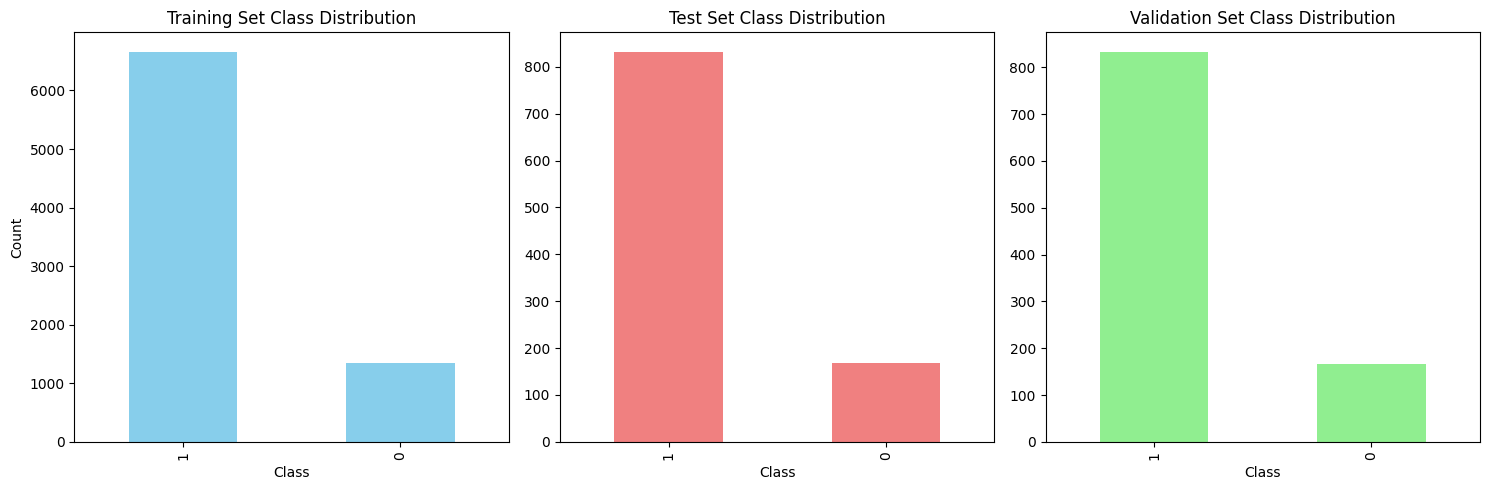

Training set class distribution:
label
1    6659
0    1341
Name: count, dtype: int64

Test set class distribution:
label
1    832
0    168
Name: count, dtype: int64

Validation set class distribution:
label
1    833
0    167
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# فرض می‌کنیم داده‌ها را قبلاً تقسیم کردیم:
# df_train, df_test, df_validation
# ستون label: 1=positive, 0=negative

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Training set
df_train['label'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Training Set Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Test set
df_test['label'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Test Set Class Distribution')
axes[1].set_xlabel('Class')

# Validation set
df_validation['label'].value_counts().plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Validation Set Class Distribution')
axes[2].set_xlabel('Class')

plt.tight_layout()
plt.show()

# نمایش تعداد دقیق نمونه‌ها
print("Training set class distribution:")
print(df_train['label'].value_counts())
print("\nTest set class distribution:")
print(df_test['label'].value_counts())
print("\nValidation set class distribution:")
print(df_validation['label'].value_counts())


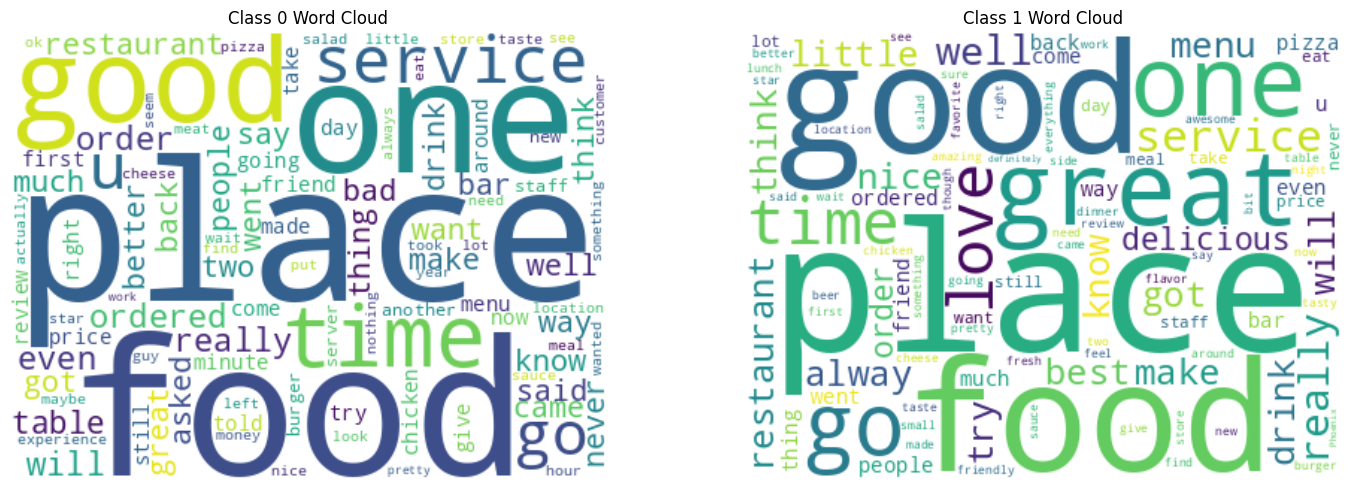

Most common words per class:

Class 0: [('the', 8758), ('and', 5900), ('I', 5828), ('to', 5316), ('a', 4988), ('was', 3600), ('of', 3129), ('for', 2269), ('in', 2099), ('that', 1994)]

Class 1: [('the', 35096), ('and', 27764), ('a', 23050), ('I', 21709), ('to', 18450), ('of', 13381), ('was', 12033), ('is', 11641), ('for', 9241), ('in', 8876)]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# اگر نیاز به فونت فارسی نیست، می‌توان از فونت پیش‌فرض استفاده کرد
# چون داده‌های Yelp انگلیسی هستند، نیازی به فونت فارسی نیست

# ایجاد word cloud برای هر کلاس
classes = df_train['label'].unique()
classes.sort()

fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))

for i, class_label in enumerate(classes):
    # ترکیب تمام متن‌ها برای این کلاس
    class_texts = ' '.join(df_train[df_train['label'] == class_label]['text'])

    # تولید word cloud
    wordcloud = WordCloud(
        background_color='white',
        width=400,
        height=300,
        max_words=100
    ).generate(class_texts)

    # نمایش
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Class {class_label} Word Cloud')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# نمایش پر تکرارترین کلمات هر کلاس
print("Most common words per class:")
for class_label in classes:
    class_texts = ' '.join(df_train[df_train['label'] == class_label]['text'])
    words = class_texts.split()
    common_words = Counter(words).most_common(10)
    print(f"\nClass {class_label}: {common_words}")


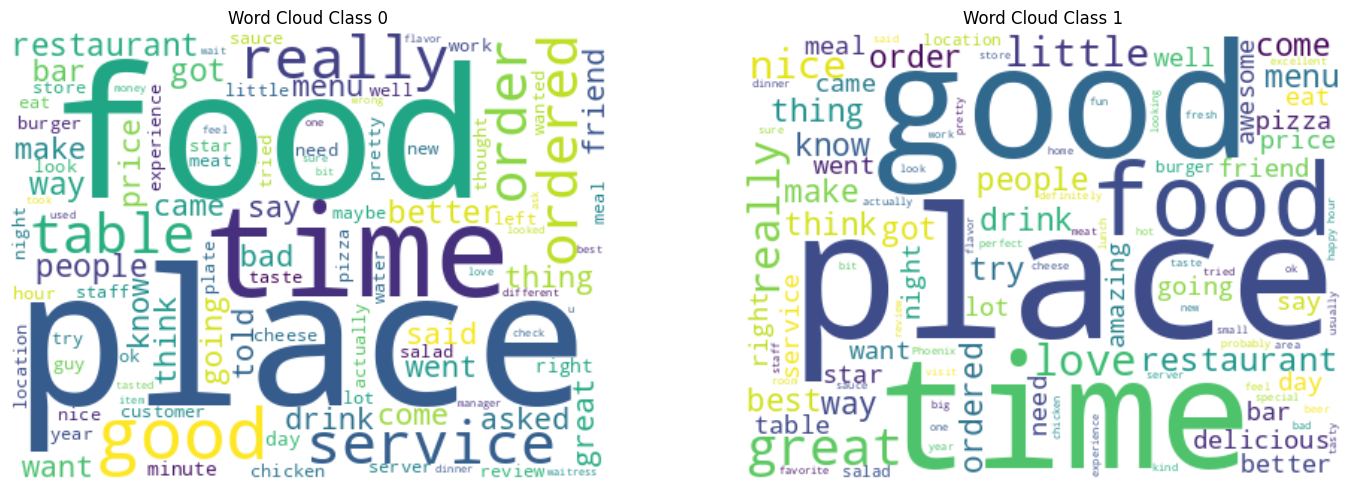

Most common words per class (after preprocessing):

Class 0: [('like', 814), ('just', 773), ('food', 706), ('place', 705), ('good', 455), ("don't", 399), ('time', 386), ('really', 367), ("didn't", 355), ('-', 346)]

Class 1: [('place', 3456), ('like', 2895), ('good', 2780), ('food', 2574), ('just', 2475), ('great', 2332), ('really', 2067), ('-', 1858), ("it's", 1543), ('little', 1532)]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# تابع پیش‌پردازش متن: حذف استاپ‌وردهای انگلیسی
def preprocess_text(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_words)

# ایجاد ابرکلمات برای هر کلاس
classes = df_train['label'].unique()
classes.sort()

fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))

for i, class_label in enumerate(classes):
    # ترکیب تمام متون این کلاس و پیش‌پردازش
    class_texts = ' '.join(df_train[df_train['label'] == class_label]['text'])
    processed_text = preprocess_text(class_texts)

    # ایجاد ابرکلمات
    wordcloud = WordCloud(
        background_color='white',
        width=400,
        height=300,
        max_words=100
    ).generate(processed_text)

    # ترسیم
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud Class {class_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# نمایش پرتکرارترین کلمات پس از پیش‌پردازش
print("Most common words per class (after preprocessing):")
for class_label in classes:
    class_texts = ' '.join(df_train[df_train['label'] == class_label]['text'])
    processed_text = preprocess_text(class_texts)
    words = processed_text.split()
    common_words = Counter(words).most_common(10)
    print(f"\nClass {class_label}: {common_words}")


Class 0: 200 frequent words
Class 1: 200 frequent words

Number of common words across all classes: 174
Common words (stop-words):
['-', 'And', 'But', 'I', "I'm", "I've", 'If', 'It', "It's", 'My', 'So', 'The', 'There', 'They', 'This', 'We', 'a', 'about', 'after', 'all', 'also', 'always', 'am', 'an', 'and', 'any', 'are', 'around', 'as', 'at', 'back', 'bar', 'be', 'because', 'been', 'before', 'being', 'better', 'but', 'by', 'came', 'can', "can't", 'cheese', 'chicken', 'come', 'could', 'did', "didn't", 'do']

Sample preprocessing:
Before: My significant other had a $25 off coupon from Restaurant.com LOL. That could sum up the whole trip. I haven't been to many restaurants that participate with restaurant.com that are decent at all. I mean, I wasn't expecting much coming into this place, I shouldn't have expected anything here.

I was in the mood for some red meat, and sushi places do actually have decent dishes like teriyaki chicken and stuff like that sometimes. So, I didn't mind checkin

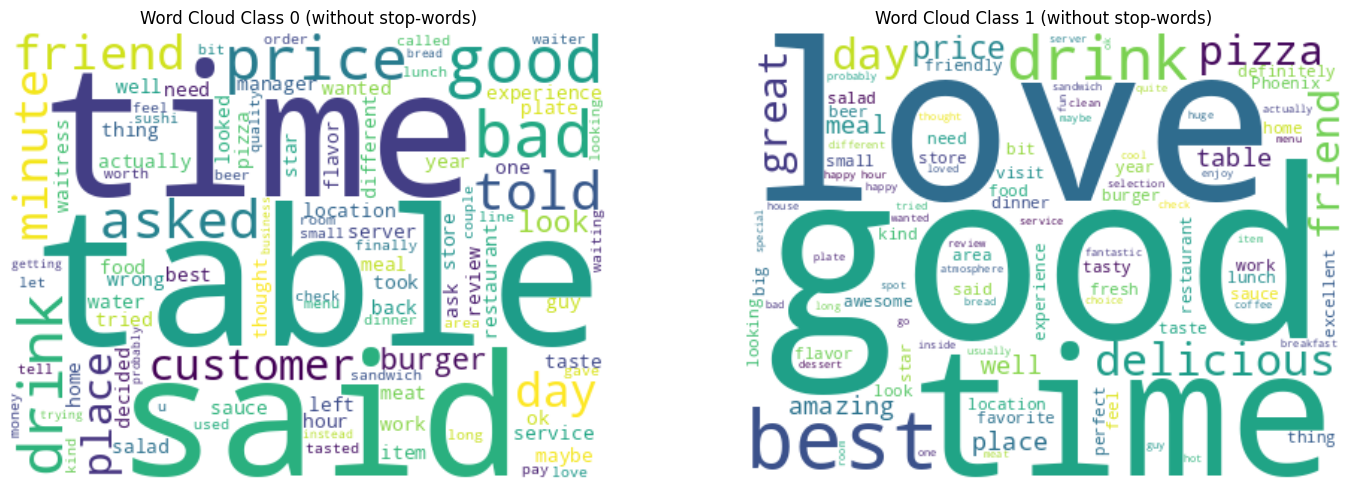


Most common words after removing stop-words:

Class 0: [("I'm", 328), ("I've", 245), ('asked', 244), ('said', 242), ('minutes', 237), ('told', 227), ("wasn't", 201), ('2', 174), ('took', 173), ('bad', 167)]

Class 1: [("I'm", 1332), ("I've", 1323), ('love', 1281), ('best', 1045), ('good.', 867), ('definitely', 747), ('bit', 688), ('&', 680), ('happy', 638), ('friendly', 632)]


In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# استخراج کلمات پرتکرار از هر کلاس
classes = df_train['label'].unique()
class_word_counts = {}

for class_label in classes:
    # ترکیب تمام متون این کلاس
    class_texts = ' '.join(df_train[df_train['label'] == class_label]['text'])
    words = class_texts.split()

    # شمارش کلمات و انتخاب 200 کلمه پرتکرار
    word_counts = Counter(words)
    top_200_words = set([word for word, count in word_counts.most_common(200)])
    class_word_counts[class_label] = top_200_words

    print(f"Class {class_label}: {len(top_200_words)} frequent words")

# پیدا کردن کلمات مشترک بین تمام کلاس‌ها
common_words = set.intersection(*class_word_counts.values())

print(f"\nNumber of common words across all classes: {len(common_words)}")
print("Common words (stop-words):")
print(sorted(list(common_words))[:50])  # نمایش 50 کلمه اول

# استفاده از کلمات مشترک به عنوان استاپ‌ورد
stop_words = common_words.union(ENGLISH_STOP_WORDS)

# تابع پیش‌پردازش متن با استاپ‌وردهای استخراج شده
def preprocess_text(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# نمایش نمونه‌ای از متون قبل و بعد از پیش‌پردازش
print("\nSample preprocessing:")
sample_text = df_train['text'].iloc[0]
print(f"Before: {sample_text}")
print(f"After:  {preprocess_text(sample_text)}")

# ایجاد ابرکلمات برای هر کلاس با استاپ‌وردهای استخراج شده
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))

for i, class_label in enumerate(classes):
    class_texts = ' '.join(df_train[df_train['label'] == class_label]['text'])
    processed_text = preprocess_text(class_texts)

    wordcloud = WordCloud(
        background_color='white',
        width=400,
        height=300,
        max_words=100
    ).generate(processed_text)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud Class {class_label} (without stop-words)')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# نمایش پرتکرارترین کلمات پس از حذف استاپ‌وردها
print("\nMost common words after removing stop-words:")
for class_label in classes:
    class_texts = ' '.join(df_train[df_train['label'] == class_label]['text'])
    processed_text = preprocess_text(class_texts)
    words = processed_text.split()
    common_words = Counter(words).most_common(10)
    print(f"\nClass {class_label}: {common_words}")


**Classification mathods**

**Random**

Random Classifier Evaluation
Accuracy: 0.4920
Precision: 0.7273
Recall: 0.4920
F1-Score: 0.5537

Classification Report
              precision    recall  f1-score   support

     Class 1       0.17      0.54      0.26       168
     Class 0       0.84      0.48      0.61       832

    accuracy                           0.49      1000
   macro avg       0.51      0.51      0.44      1000
weighted avg       0.73      0.49      0.55      1000


Confusion Matrix
[[ 91  77]
 [431 401]]


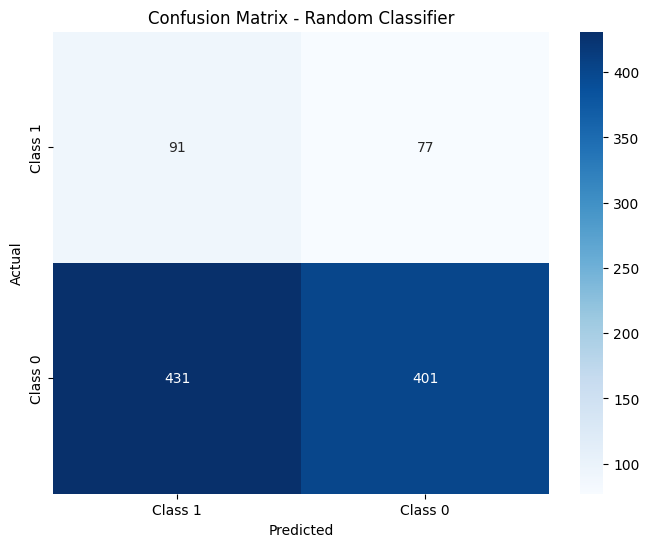


Class Distribution
Actual Distribution:
0    168
1    832
Name: count, dtype: int64

Predicted Distribution:
0    522
1    478
Name: count, dtype: int64

Sample Random Predictions
Text: The place was pretty busy when my husband and I visited one night. 
The decor was ok but very kitsch...
True Label: 0, Predicted Label: 1
Status: ✗ Incorrect
--------------------------------------------------
Text: I'd been hearing about Defalco's for a while now. My husband, Jim W, and my youngest, Abby, raved. "...
True Label: 1, Predicted Label: 1
Status: ✓ Correct
--------------------------------------------------
Text: Cheesy, beefy, greasy GREATNESS.  
 
The burgers are made as you watch..  Sit at the bar and watch t...
True Label: 1, Predicted Label: 1
Status: ✓ Correct
--------------------------------------------------
Text: How can you not love Westgate??? They really do have it all for everyone!!! 

Plenty of places to ge...
True Label: 1, Predicted Label: 0
Status: ✗ Incorrect
--------------

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

# برچسب‌های واقعی و کلاس‌ها
y_true = df_test['label'].tolist()
classes = df_test['label'].unique()

# برچسب‌گذاری تصادفی داده‌های تست
y_pred_random = [random.choice(classes) for _ in range(len(df_test))]

# محاسبه پارامترهای ارزیابی
accuracy = accuracy_score(y_true, y_pred_random)
precision = precision_score(y_true, y_pred_random, average='weighted')
recall = recall_score(y_true, y_pred_random, average='weighted')
f1 = f1_score(y_true, y_pred_random, average='weighted')

print("="*60)
print("Random Classifier Evaluation")
print("="*60)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# گزارش کامل طبقه‌بندی
print("\n" + "="*60)
print("Classification Report")
print("="*60)
print(classification_report(y_true, y_pred_random, target_names=[f'Class {c}' for c in classes]))

# ماتریس درهم‌ریختگی
print("\n" + "="*60)
print("Confusion Matrix")
print("="*60)
cm = confusion_matrix(y_true, y_pred_random)
print(cm)

# نمایش ماتریس به صورت گرافیکی
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {c}' for c in classes],
            yticklabels=[f'Class {c}' for c in classes])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Classifier')
plt.show()

# توزیع کلاس‌ها
print("\n" + "="*60)
print("Class Distribution")
print("="*60)
print("Actual Distribution:")
print(pd.Series(y_true).value_counts().sort_index())
print("\nPredicted Distribution:")
print(pd.Series(y_pred_random).value_counts().sort_index())

# نمایش نمونه‌ای از پیش‌بینی‌ها
print("\n" + "="*60)
print("Sample Random Predictions")
print("="*60)

sample_indices = random.sample(range(len(df_test)), min(5, len(df_test)))
for idx in sample_indices:
    text = df_test['text'].iloc[idx]
    true_label = df_test['label'].iloc[idx]
    pred_label = y_pred_random[idx]

    print(f"Text: {text[:100]}...")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print(f"Status: {'✓ Correct' if true_label == pred_label else '✗ Incorrect'}")
    print("-" * 50)


**Simple Hiuristic method**

Class 0: 200 top words
Class 1: 200 top words
Class 0 after removing common words: 26
Class 1 after removing common words: 26

Classifier Evaluation
Accuracy: 0.6500
Precision: 0.8012
Recall: 0.6500
F1-Score: 0.6934

Classification Report
              precision    recall  f1-score   support

     Class 0       0.28      0.67      0.39       168
     Class 1       0.91      0.65      0.75       832

    accuracy                           0.65      1000
   macro avg       0.59      0.66      0.57      1000
weighted avg       0.80      0.65      0.69      1000


Confusion Matrix
[[113  55]
 [295 537]]


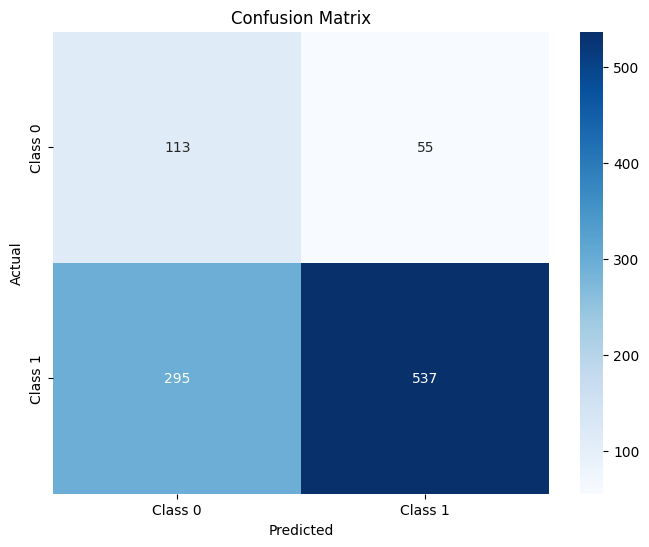


Class-wise Metrics
Class 0:
  Precision: 0.2770
  Recall: 0.6726
  F1-Score: 0.3924

Class 1:
  Precision: 0.9071
  Recall: 0.6454
  F1-Score: 0.7542


Sample Predictions
Text: If you haven't shopped at a Fresh and Easy, the simple way to describe the store is it's like Trader...
True Label: 1, Predicted Label: 1
Status: ✓ Correct
--------------------------------------------------
Text: This was another stop on our pub crawl and I only had one drink here so I don't have too much to go ...
True Label: 1, Predicted Label: 0
Status: ✗ Incorrect
--------------------------------------------------
Text: Ok..I told Amanda that anyplace that serves beer would have a tough time getting less than 2 stars f...
True Label: 0, Predicted Label: 0
Status: ✓ Correct
--------------------------------------------------
Text: I am in love.  This restaurant does everything a good restaurant should.  Ambiance, service and prod...
True Label: 1, Predicted Label: 1
Status: ✓ Correct
-------------------------

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 1. استخراج 200 کلمه پرتکرار هر کلاس از داده‌های آموزشی
classes = sorted(df_train['label'].unique())
class_top_words = {}

for class_label in classes:
    # ترکیب تمام متون این کلاس
    class_texts = ' '.join(df_train[df_train['label'] == class_label]['text'])
    words = class_texts.split()

    # شمارش کلمات و انتخاب 200 کلمه پرتکرار
    word_counts = Counter(words)
    top_200_words = set([word for word, count in word_counts.most_common(200)])
    class_top_words[class_label] = top_200_words

    print(f"Class {class_label}: {len(top_200_words)} top words")

# 2. حذف اشتراک بین کلاس‌ها
common_words = set.intersection(*class_top_words.values())

# حذف کلمات مشترک از هر لیست
class_unique_words = {}
for class_label in classes:
    class_unique_words[class_label] = class_top_words[class_label] - common_words
    print(f"Class {class_label} after removing common words: {len(class_unique_words[class_label])}")

# 3. تابع پیش‌بینی بر اساس حضور کلمات هر کلاس
def predict_label(text):
    words_in_text = set(text.split())
    class_counts = {c: len(words_in_text.intersection(class_unique_words[c])) for c in classes}

    if sum(class_counts.values()) > 0:
        return max(class_counts.items(), key=lambda x: x[1])[0]
    else:
        return random.choice(classes)

# پیش‌بینی برچسب‌ها
y_true = df_test['label'].tolist()
y_pred = [predict_label(text) for text in df_test['text']]

# 4. محاسبه معیارهای ارزیابی
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("\n" + "="*60)
print("Classifier Evaluation")
print("="*60)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# گزارش کامل طبقه‌بندی
print("\n" + "="*60)
print("Classification Report")
print("="*60)
print(classification_report(y_true, y_pred, target_names=[f'Class {c}' for c in classes]))

# ماتریس درهم‌ریختگی
print("\n" + "="*60)
print("Confusion Matrix")
print("="*60)
cm = confusion_matrix(y_true, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {c}' for c in classes],
            yticklabels=[f'Class {c}' for c in classes])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# معیارهای تفکیک شده برای هر کلاس
print("\n" + "="*60)
print("Class-wise Metrics")
print("="*60)
for class_label in classes:
    class_precision = precision_score(y_true, y_pred, labels=[class_label], average='micro')
    class_recall = recall_score(y_true, y_pred, labels=[class_label], average='micro')
    class_f1 = f1_score(y_true, y_pred, labels=[class_label], average='micro')

    print(f"Class {class_label}:")
    print(f"  Precision: {class_precision:.4f}")
    print(f"  Recall: {class_recall:.4f}")
    print(f"  F1-Score: {class_f1:.4f}\n")

# نمایش نمونه‌ای از پیش‌بینی‌ها
print("\n" + "="*60)
print("Sample Predictions")
print("="*60)
sample_indices = random.sample(range(len(df_test)), min(5, len(df_test)))
for idx in sample_indices:
    text = df_test['text'].iloc[idx]
    true_label = df_test['label'].iloc[idx]
    pred_label = y_pred[idx]

    print(f"Text: {text[:100]}...")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print(f"Status: {'✓ Correct' if true_label == pred_label else '✗ Incorrect'}")
    print("-" * 50)


**Parsbert**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm

# بارگذاری مدل انگلیسی از Hugging Face
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# انتقال مدل به GPU در صورت موجود بودن
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model loaded on {device}")

# تابع پیش‌بینی دسته‌بندی متن
def predict_sentiment(texts, batch_size=16):
    predictions = []

    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]

        # توکنایز کردن متن‌ها
        inputs = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors="pt"
        )

        # انتقال به دستگاه مورد نظر
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # پیش‌بینی
        with torch.no_grad():
            outputs = model(**inputs)

        # گرفتن پیش‌بینی‌ها
        batch_predictions = torch.argmax(outputs.logits, dim=1)
        predictions.extend(batch_predictions.cpu().numpy())

    return predictions

# پیش‌بینی روی داده‌های تست Yelp
print("Predicting on test data...")
test_texts = df_test['text'].tolist()
y_pred_bert = predict_sentiment(test_texts)

print("Predictions done. Sample:")
print(y_pred_bert[:10])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Model loaded on cpu
Predicting on test data...


100%|██████████| 63/63 [11:23<00:00, 10.85s/it]

Predictions done. Sample:
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0)]
